<a href="https://colab.research.google.com/github/minhduc01168/ET_Tri_tue_nhan_tao/blob/master/Feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature importance là một khái niệm trong học máy để đo lường quan trọng của từng feature (đặc trưng) trong tập dữ liệu. Nó cho ta biết được từng feature có đóng góp nhiều hay ít trong quá trình huấn luyện và dự đoán của mô hình. Có nhiều cách để tính feature importance, nhưng cách thông dụng nhất là sử dụng các thuật toán Decision Tree và Random Forest.
Chúng ta sử dụng hàm fit() để huấn luyện mô hình và sau đó sử dụng thuộc tính feature_importances_ để lấy ra giá trị quan trọng của các feature.

Kết quả sẽ trả về một mảng giá trị quan trọng của các feature, trong đó mỗi giá trị tương ứng với một feature trong tập dữ liệu. Các giá trị này có thể được sắp xếp theo thứ tự quan trọng từ cao đến thấp để tìm ra feature quan trọng nhất.

Lưu ý rằng kết quả của tính năng quan trọng có thể khác nhau khi sử dụng các thuật toán khác nhau, và cũng có thể khác nhau khi sử dụng cùng một thuật toán nhưng với các tham số khác nhau.

In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, accuracy_score
from imblearn import under_sampling, over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_normalization.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.038462,0.026807,0.666667,0.3125,0.2,0.25,0.018450,0.400841,0.0,0.191489,0.0,0.000000
1,0.038462,0.028263,0.666667,0.1250,1.0,0.00,0.073801,0.120533,1.0,0.510638,0.0,0.000000
2,0.038462,0.028749,0.666667,0.3750,1.0,0.75,0.040590,0.653118,1.0,0.319149,0.0,0.071429
3,0.038462,0.028749,0.666667,0.1250,0.4,0.00,0.147601,0.224947,1.0,0.936170,0.0,0.000000
4,0.153846,0.032634,0.000000,0.5000,0.2,0.25,0.046125,0.390329,1.0,0.319149,0.0,0.000000


In [ ]:
X = pd.DataFrame(df)
X = X.drop(['loan_status'], axis=1)
y = df[['loan_status']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29998 non-null  float64
 1   person_income               29998 non-null  float64
 2   person_home_ownership       29998 non-null  float64
 3   person_emp_length           29998 non-null  float64
 4   loan_intent                 29998 non-null  float64
 5   loan_grade                  29998 non-null  float64
 6   loan_amnt                   29998 non-null  float64
 7   loan_int_rate               29998 non-null  float64
 8   loan_percent_income         29998 non-null  float64
 9   cb_person_default_on_file   29998 non-null  float64
 10  cb_person_cred_hist_length  29998 non-null  float64
dtypes: float64(11)
memory usage: 2.5 MB


In [ ]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.038462,0.026807,0.666667,0.3125,0.2,0.25,0.018450,0.400841,0.191489,0.0,0.000000
1,0.038462,0.028263,0.666667,0.1250,1.0,0.00,0.073801,0.120533,0.510638,0.0,0.000000
2,0.038462,0.028749,0.666667,0.3750,1.0,0.75,0.040590,0.653118,0.319149,0.0,0.071429
3,0.038462,0.028749,0.666667,0.1250,0.4,0.00,0.147601,0.224947,0.936170,0.0,0.000000
4,0.153846,0.032634,0.000000,0.5000,0.2,0.25,0.046125,0.390329,0.319149,0.0,0.000000


In [ ]:
y.head()

,loan_status
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
y = y.values.ravel()

In [ ]:
# K-best Method
best_features = SelectKBest(score_func=chi2, k=11) #Chọn các tính năng theo k điểm cao nhất.
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)# Điểm số của các tính năng
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)# Nối các đối tượng pandas dọc theo cột.
feature_scores.columns = ["Feature","Score"]
print(feature_scores.nlargest(11,"Score"))

                       Feature       Score
5                   loan_grade  979.486278
9    cb_person_default_on_file  756.959610
8          loan_percent_income  510.348486
2        person_home_ownership  509.438695
7                loan_int_rate  316.182079
1                person_income  160.386595
3            person_emp_length   40.968762
6                    loan_amnt   26.140949
4                  loan_intent   24.132526
0                   person_age    3.029378
10  cb_person_cred_hist_length    3.014954


### **KNN**

Feature: 0, Score: 0.00813
Feature: 1, Score: 0.01517
Feature: 2, Score: 0.06489
Feature: 3, Score: 0.02147
Feature: 4, Score: 0.04286
Feature: 5, Score: 0.07993
Feature: 6, Score: 0.01599
Feature: 7, Score: 0.01777
Feature: 8, Score: 0.07983
Feature: 9, Score: 0.01225
Feature: 10, Score: 0.01107


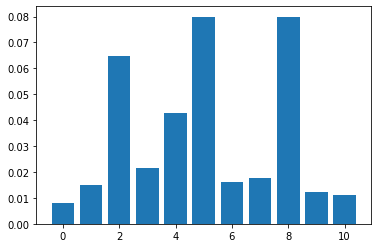

In [ ]:
# Permutation Importance method (for KNN)

# define the model
model = KNeighborsClassifier()
# fit
model.fit(X, y)
# perform permutation importance to get the importances of the features
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Accuracy score of KNN is: 0.8971666666666667
[[4644  115]
 [ 502  739]]
Classification Report of KNN
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      4759
         1.0       0.87      0.60      0.71      1241

    accuracy                           0.90      6000
   macro avg       0.88      0.79      0.82      6000
weighted avg       0.89      0.90      0.89      6000



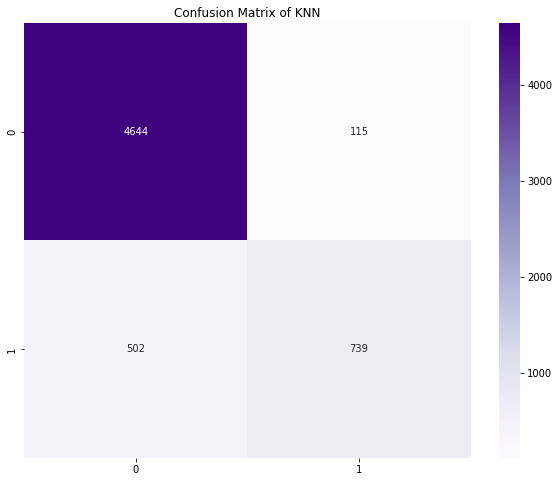

In [ ]:
"""3) Feature Importance"""

# 'person_age',	'person_income', 'person_home_ownership',	'person_emp_length',	'loan_intent',	'loan_grade',	'loan_amnt',	'loan_int_rate',	'loan_percent_income',	'cb_person_default_on_file',	'cb_person_cred_hist_length'
X_1 = X[['person_home_ownership','person_emp_length','loan_intent',	'loan_grade','loan_percent_income']]

# Train, Test, Split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, y, test_size = 0.2, random_state=152, stratify=y)

# Define the model
clf_1 = KNeighborsClassifier()

# Fit the model
clf_1.fit(X_train_1,Y_train_1)

# Make prediction
pred_1 = clf_1.predict(X_test_1)

# Accuracy score
print('Accuracy score of KNN is:', accuracy_score(Y_test_1, pred_1))

# Confusion Matrix
conmat_1 = confusion_matrix(Y_test_1, pred_1)
print(conmat_1)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of KNN')
sns.heatmap(conmat_1, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of KNN')
print(classification_report(Y_test_1, pred_1))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# KNN classifier
knn = KNeighborsClassifier()

# Use k-fold cross validation with k=10
scores = cross_val_score(knn, X, y, cv=10)

# Print the mean and standard deviation of the scores
print("Array acucuracy KNN ")
print(scores)
print("Accuracy: %0.2f" % scores.mean())

Array acucuracy KNN 
[0.88466667 0.85966667 0.87333333 0.88833333 0.88966667 0.86466667
 0.84166667 0.86166667 0.88096032 0.87662554]
Accuracy: 0.87


## **Decision Tree Classifier**

Feature: 0, Score: 0.03890
Feature: 1, Score: 0.14139
Feature: 2, Score: 0.14084
Feature: 3, Score: 0.05646
Feature: 4, Score: 0.09738
Feature: 5, Score: 0.15418
Feature: 6, Score: 0.04821
Feature: 7, Score: 0.05906
Feature: 8, Score: 0.23055
Feature: 9, Score: 0.00520
Feature: 10, Score: 0.02783


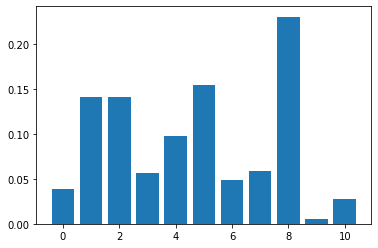

In [ ]:
# Decision Tree Classifier Feature Importance method

# define the model
model = DecisionTreeClassifier()
# fit
model.fit(X, y)
# get the importances of the features based on decision tree model
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Accuracy score of Decision Tree is: 0.8831666666666667
[[4417  342]
 [ 359  882]]
Classification Report of Decision Tree
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      4759
         1.0       0.72      0.71      0.72      1241

    accuracy                           0.88      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.88      0.88      0.88      6000



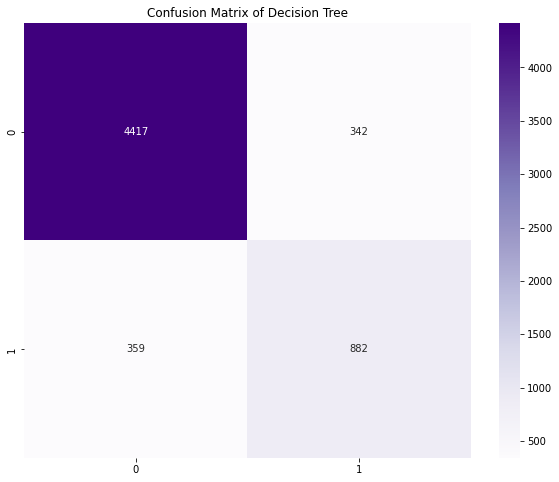

In [ ]:
"""3) Feature importance"""
#'person_income', 'person_home_ownership','loan_intent',	'loan_grade','loan_percent_income'
X_2 = X[['person_income','person_home_ownership','loan_intent', 'loan_grade','loan_percent_income']]

X_2

# Train, Test, Split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, y, test_size = 0.2,random_state=152, stratify=y)

# Define the model
clf_2 = DecisionTreeClassifier()

# Fit the model
clf_2.fit(X_train_2,Y_train_2)

# Make prediction
pred_2 = clf_2.predict(X_test_2)

# Accuracy score
print('Accuracy score of Decision Tree is:', accuracy_score(Y_test_2, pred_2))

# Confusion Matrix
conmat_2 = confusion_matrix(Y_test_2, pred_2)
print(conmat_2)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Decision Tree')
sns.heatmap(conmat_2, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Decision Tree')
print(classification_report(Y_test_2, pred_2))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Decision Tree classifier
dt = DecisionTreeClassifier()

# Use k-fold cross validation with k=10
scores = cross_val_score(dt, X, y, cv=10)

# Print the mean and standard deviation of the scores
print("Array acucuracy Decision Tree Classifier ")
print(scores)
print("Accuracy: %0.2f" % scores.mean())

Array acucuracy Decision Tree Classifier 
[0.82633333 0.76666667 0.78866667 0.828      0.88266667 0.89933333
 0.83933333 0.83066667 0.89996666 0.8612871 ]
Accuracy: 0.84


## **Random Forest Classifier**

Feature: 0, Score: 0.04498
Feature: 1, Score: 0.15487
Feature: 2, Score: 0.09904
Feature: 3, Score: 0.06498
Feature: 4, Score: 0.07322
Feature: 5, Score: 0.11119
Feature: 6, Score: 0.07141
Feature: 7, Score: 0.10962
Feature: 8, Score: 0.22423
Feature: 9, Score: 0.01123
Feature: 10, Score: 0.03522


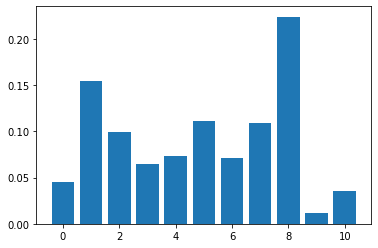

In [ ]:
# Random Forest Classifier Feature Importance method

# define the model
model = RandomForestClassifier()
# fit
model.fit(X, y)
# get the importances of the features based on random forest model
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Accuracy score of Random Forest model 3 is: 0.9023333333333333
[[4603  156]
 [ 430  811]]
Classification Report of Random Forest
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      4759
         1.0       0.84      0.65      0.73      1241

    accuracy                           0.90      6000
   macro avg       0.88      0.81      0.84      6000
weighted avg       0.90      0.90      0.90      6000



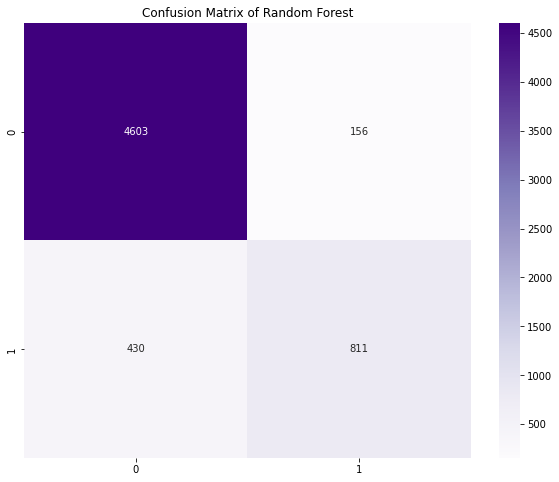

In [ ]:
"""3) Feature Importance"""

X_3 = X[['person_income','person_home_ownership','loan_grade', 'loan_int_rate','loan_percent_income']]

# Train, Test, Split
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, y, test_size = 0.2,random_state=152, stratify=y)

# Define the model
clf_3 = RandomForestClassifier()

# Fit tme model
clf_3.fit(X_train_3,Y_train_3)

# Make prediction
pred_3 = clf_3.predict(X_test_3)

# Accuracy score
print('Accuracy score of Random Forest model 3 is:', accuracy_score(Y_test_3, pred_3))

# Confusion Matrix
conmat_3 = confusion_matrix(Y_test_3, pred_3)
print(conmat_3)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Random Forest')
sns.heatmap(conmat_3, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Random Forest')
print(classification_report(Y_test_3, pred_3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Random Forest Classifier
rf = RandomForestClassifier()

# Use k-fold cross validation with k=10
scores = cross_val_score(rf, X, y, cv=10)

# Print the mean and standard deviation of the scores
print("Array acucuracy Random Forest Classifier ")
print(scores)
print("Accuracy: %0.2f" % scores.mean())

Array acucuracy Random Forest Classifier 
[0.91533333 0.91166667 0.88666667 0.91566667 0.92233333 0.932
 0.92933333 0.90166667 0.92664221 0.93697899]
Accuracy: 0.92
